# Figure S4

Non-perturbing, more detailed. Surviving ratios & basins of attractors

In [1]:
import torch
import mat73
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import math
import matplotlib
matplotlib.rcParams.update({'font.size': 11})

In [2]:
#loadEGC = mat73.loadmat("./data/EGCresultv1v1.mat")
loadEGC = mat73.loadmat("./data/EGCresulthalf.mat")
egc = torch.tensor(loadEGC["egc"]).type('torch.FloatTensor')

num_rho, num_samp = egc.size()
Ns = 16
Nr = 32
num_init = 50 # different initial consitions for simulation
EGC = egc.unsqueeze(-1).repeat(1,1,num_init)

'''
Fractions = torch.tensor(mat73.loadmat('./data/Aug28/DiveDynv1.mat')["Fractions"])
FracLin = torch.tensor(mat73.loadmat('./data/Sep3/DiveDynv1Lin.mat')["Fractions"])
FracLog = torch.tensor(mat73.loadmat('./data/Sep3/DiveDynv1LogVCABM3.mat')["Fractions"])
'''
Fractions = torch.tensor(mat73.loadmat('./data/Nov23/DiveDynhalfVern.mat')["Fractions"])
FracLin = torch.tensor(mat73.loadmat('./data/Nov23/DiveDynv1Linhalf.mat')["Fractions"])
FracLog = torch.tensor(mat73.loadmat('./data/Nov23/DiveDynv1Loghalf.mat')["Fractions"])

In [3]:
Fluc = Fractions[:,:,:,1] + Fractions[:,:,:,2]
GStable = 1 - Fluc - Fractions[:,:,:,3]
full_gs = ((GStable == 1.0) & (Fractions[:,:,:,0] == 1.0)).float()

x_mean = []
x_std = []

alt_mean = []
alt_std = []

fl_mean = []
fl_std = []

fgs_mean = []
fgs_std = []

pgs_mean = []
pgs_std = []

chaos_mean = []
chaos_std = []

lim_mean = []
lim_std = []

for i in range(60):
    indeces = ((i*0.05<=EGC) & (EGC<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[:,:,:,3][indeces]
    y1_group = Fluc[indeces]
    y2_group = full_gs[indeces]
    y3_group = 1.0 - y_group - y1_group - y2_group
    y4_group = Fractions[:,:,:,1][indeces]
    y5_group = Fractions[:,:,:,2][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])/num_init))
        alt_mean.append(torch.mean(y_group))
        alt_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])/num_init))
        fl_mean.append(torch.mean(y1_group))
        fl_std.append(torch.std(y1_group)/math.sqrt(len(indeces[0])/num_init))
        fgs_mean.append(torch.mean(y2_group))
        fgs_std.append(torch.std(y2_group)/math.sqrt(len(indeces[0])/num_init))
        pgs_mean.append(torch.mean(y3_group))
        pgs_std.append(torch.std(y3_group)/math.sqrt(len(indeces[0])/num_init))
        chaos_mean.append(torch.mean(y4_group))
        chaos_std.append(torch.std(y4_group)/math.sqrt(len(indeces[0])/num_init))
        lim_mean.append(torch.mean(y5_group))
        lim_std.append(torch.std(y5_group)/math.sqrt(len(indeces[0])/num_init))

In [4]:
FlucLi = FracLin[:,:,:,1] + FracLin[:,:,:,2]
GStableLi = 1 - FlucLi - FracLin[:,:,:,3]
fullLi_gs = ((GStableLi == 1.0) & (FracLin[:,:,:,0] == 1.0)).float()

x_mean = []
x_std = []

altLi_mean = []
altLi_std = []

flLi_mean = []
flLi_std = []

fgsLi_mean = []
fgsLi_std = []

pgsLi_mean = []
pgsLi_std = []

chaosLi_mean = []
chaosLi_std = []

limLi_mean = []
limLi_std = []

for i in range(60):
    indeces = ((i*0.05<=EGC) & (EGC<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = FracLin[:,:,:,3][indeces]
    y1_group = FlucLi[indeces]
    y2_group = fullLi_gs[indeces]
    y3_group = 1.0 - y_group - y1_group - y2_group
    y4_group = FracLin[:,:,:,1][indeces]
    y5_group = FracLin[:,:,:,2][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])/num_init))
        altLi_mean.append(torch.mean(y_group))
        altLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])/num_init))
        flLi_mean.append(torch.mean(y1_group))
        flLi_std.append(torch.std(y1_group)/math.sqrt(len(indeces[0])/num_init))
        fgsLi_mean.append(torch.mean(y2_group))
        fgsLi_std.append(torch.std(y2_group)/math.sqrt(len(indeces[0])/num_init))
        pgsLi_mean.append(torch.mean(y3_group))
        pgsLi_std.append(torch.std(y3_group)/math.sqrt(len(indeces[0])/num_init))
        chaosLi_mean.append(torch.mean(y4_group))
        chaosLi_std.append(torch.std(y4_group)/math.sqrt(len(indeces[0])/num_init))
        limLi_mean.append(torch.mean(y5_group))
        limLi_std.append(torch.std(y5_group)/math.sqrt(len(indeces[0])/num_init))


In [5]:
FlucLo = FracLog[:,:,:,1] + FracLog[:,:,:,2]
GStableLo = 1 - FlucLo - FracLog[:,:,:,3]
fullLo_gs = ((GStableLo == 1.0) & (FracLog[:,:,:,0] == 1.0)).float()

x_mean = []
x_std = []

altLo_mean = []
altLo_std = []

flLo_mean = []
flLo_std = []

fgsLo_mean = []
fgsLo_std = []

pgsLo_mean = []
pgsLo_std = []

chaosLo_mean = []
chaosLo_std = []

limLo_mean = []
limLo_std = []

for i in range(60):
    indeces = ((i*0.05<=EGC) & (EGC<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = FracLog[:,:,:,3][indeces]
    y1_group = FlucLo[indeces]
    y2_group = fullLo_gs[indeces]
    y3_group = 1.0 - y_group - y1_group - y2_group
    y4_group = FracLog[:,:,:,1][indeces]
    y5_group = FracLog[:,:,:,2][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])/num_init))
        altLo_mean.append(torch.mean(y_group))
        altLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])/num_init))
        flLo_mean.append(torch.mean(y1_group))
        flLo_std.append(torch.std(y1_group)/math.sqrt(len(indeces[0])/num_init))
        fgsLo_mean.append(torch.mean(y2_group))
        fgsLo_std.append(torch.std(y2_group)/math.sqrt(len(indeces[0])/num_init))
        pgsLo_mean.append(torch.mean(y3_group))
        pgsLo_std.append(torch.std(y3_group)/math.sqrt(len(indeces[0])/num_init))
        chaosLo_mean.append(torch.mean(y4_group))
        chaosLo_std.append(torch.std(y4_group)/math.sqrt(len(indeces[0])/num_init))
        limLo_mean.append(torch.mean(y5_group))
        limLo_std.append(torch.std(y5_group)/math.sqrt(len(indeces[0])/num_init))

Fluctuation

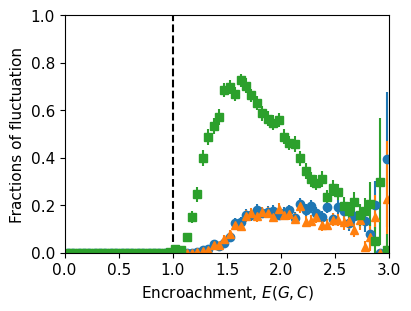

In [6]:
plt.figure(figsize=(4, 3),constrained_layout=True)
#plt.errorbar(x_mean,alt_mean, xerr=x_std, yerr= alt_std, marker = 's', ls='none')
plt.errorbar(x_mean,fl_mean, xerr=x_std, yerr= fl_std, marker = 'o', ls='none')
plt.errorbar(x_mean,flLi_mean, xerr=x_std, yerr= flLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,flLo_mean, xerr=x_std, yerr= flLo_std, marker = 's', ls='none')

plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,3.0)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fractions of fluctuation')
plt.savefig("../../figures/FigS4emb1v1.eps", format = "eps")

chaos

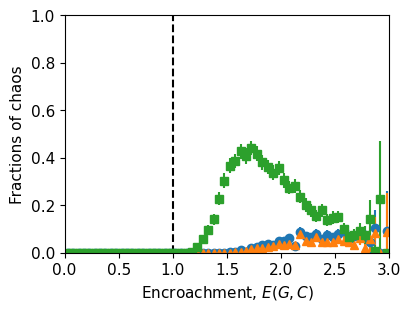

In [7]:
plt.figure(figsize=(4, 3),constrained_layout=True)
#plt.errorbar(x_mean,alt_mean, xerr=x_std, yerr= alt_std, marker = 's', ls='none')
plt.errorbar(x_mean,chaos_mean, xerr=x_std, yerr= chaos_std, marker = 'o', ls='none')
plt.errorbar(x_mean,chaosLi_mean, xerr=x_std, yerr= chaosLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,chaosLo_mean, xerr=x_std, yerr= chaosLo_std, marker = 's', ls='none')

plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,3.0)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fractions of chaos')
plt.savefig("../../figures/FigS4emb7v1.eps", format = "eps")

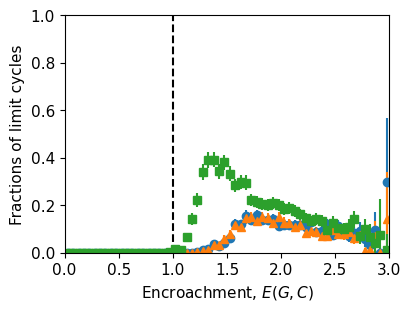

In [8]:
plt.figure(figsize=(4, 3),constrained_layout=True)
#plt.errorbar(x_mean,alt_mean, xerr=x_std, yerr= alt_std, marker = 's', ls='none')
plt.errorbar(x_mean,lim_mean, xerr=x_std, yerr= lim_std, marker = 'o', ls='none')
plt.errorbar(x_mean,limLi_mean, xerr=x_std, yerr= limLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,limLo_mean, xerr=x_std, yerr= limLo_std, marker = 's', ls='none')

plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,3.0)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fractions of limit cycles')
plt.savefig("../../figures/FigS4emb8v1.eps", format = "eps")

Alternative stable states

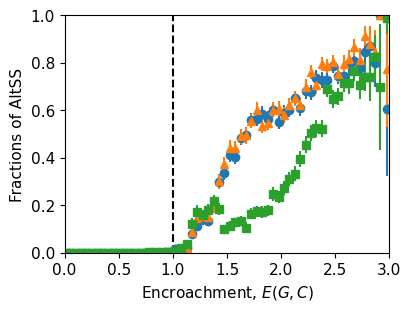

In [9]:
plt.figure(figsize=(4, 3),constrained_layout=True)
#plt.errorbar(x_mean,alt_mean, xerr=x_std, yerr= alt_std, marker = 's', ls='none')
plt.errorbar(x_mean,alt_mean, xerr=x_std, yerr= alt_std, marker = 'o', ls='none')
plt.errorbar(x_mean,altLi_mean, xerr=x_std, yerr= altLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,altLo_mean, xerr=x_std, yerr= altLo_std, marker = 's', ls='none')

plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,3.0)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fractions of AltSS')
plt.savefig("../../figures/FigS4emb2v1.eps", format = "eps")

Fully coexisting globally stable

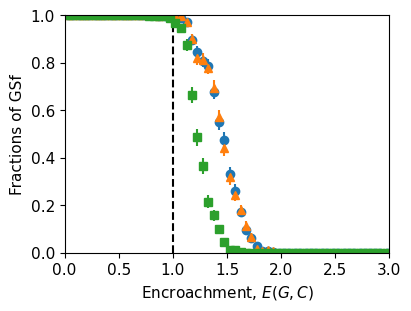

In [10]:
plt.figure(figsize=(4, 3),constrained_layout=True)
#plt.errorbar(x_mean,alt_mean, xerr=x_std, yerr= alt_std, marker = 's', ls='none')
plt.errorbar(x_mean,fgs_mean, xerr=x_std, yerr= fgs_std, marker = 'o', ls='none')
plt.errorbar(x_mean,fgsLi_mean, xerr=x_std, yerr= fgsLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,fgsLo_mean, xerr=x_std, yerr= fgsLo_std, marker = 's', ls='none')

plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,3.0)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fractions of GSf')
plt.savefig("../../figures/FigS4emb3v1.eps", format = "eps")

partially coexisting globaly stable

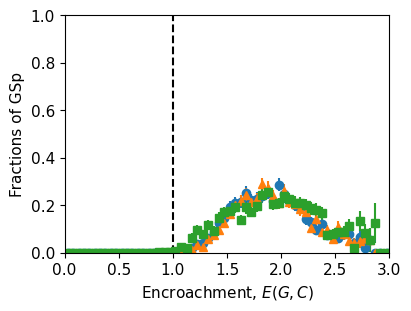

In [11]:
plt.figure(figsize=(4, 3),constrained_layout=True)
#plt.errorbar(x_mean,alt_mean, xerr=x_std, yerr= alt_std, marker = 's', ls='none')
plt.errorbar(x_mean,pgs_mean, xerr=x_std, yerr= pgs_std, marker = 'o', ls='none')
plt.errorbar(x_mean,pgsLi_mean, xerr=x_std, yerr= pgsLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,pgsLo_mean, xerr=x_std, yerr= pgsLo_std, marker = 's', ls='none')

plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,3.0)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fractions of GSp')
plt.savefig("../../figures/FigS4emb4v1.eps", format = "eps")

fraction of survival

In [12]:
Eval = torch.zeros(2,30) # first dim: mean and std; second dim: 10 E values
Fval = torch.zeros(2,30) 
Sval = torch.zeros(2,30)

FLival = torch.zeros(2,30) 
SLival = torch.zeros(2,30)

FLoval = torch.zeros(2,30) 
SLoval = torch.zeros(2,30)
#pVal = torch.zeros(30)


for i in range(30):
    Emean = 0.1*i

    Econdi = ((EGC >= Emean - 0.05) & (EGC <= Emean + 0.05))
    Eval[0,i] = EGC[Econdi.nonzero(as_tuple=True)].mean()
    Eval[1,i] = EGC[Econdi.nonzero(as_tuple=True)].std()

    event = ((Fractions[:,:,:,1] == 1.0) | (Fractions[:,:,:,2] == 1.0)) & Econdi
    aevent = (~event) & Econdi # & (Fractions[:,:,:,0] != 1.0)

    fluc = Fractions[:,:,:,0][event.nonzero(as_tuple=True)]
    Fval[0,i] = fluc.mean()
    Fval[1,i] = fluc.std()/math.sqrt(len(fluc)/num_init)

    stdy = Fractions[:,:,:,0][aevent.nonzero(as_tuple=True)]
    Sval[0,i] = stdy.mean()
    Sval[1,i] = stdy.std()/math.sqrt(len(stdy)/num_init)

    eventLi = ((FracLin[:,:,:,1] == 1.0) | (FracLin[:,:,:,2] == 1.0)) & Econdi
    aeventLi = (~eventLi) & Econdi # & (Fractions[:,:,:,0] != 1.0)

    flucLi = FracLin[:,:,:,0][eventLi.nonzero(as_tuple=True)]
    FLival[0,i] = flucLi.mean()
    FLival[1,i] = flucLi.std()/math.sqrt(len(flucLi)/num_init)

    stdyLi = FracLin[:,:,:,0][aeventLi.nonzero(as_tuple=True)]
    SLival[0,i] = stdyLi.mean()
    SLival[1,i] = stdyLi.std()/math.sqrt(len(stdyLi)/num_init)

    eventLo = ((FracLog[:,:,:,1] == 1.0) | (FracLog[:,:,:,2] == 1.0)) & Econdi
    aeventLo = (~eventLo) & Econdi # & (Fractions[:,:,:,0] != 1.0)

    flucLo = FracLog[:,:,:,0][eventLo.nonzero(as_tuple=True)]
    FLoval[0,i] = flucLo.mean()
    FLoval[1,i] = flucLo.std()/math.sqrt(len(flucLo)/num_init)

    stdyLo = FracLog[:,:,:,0][aeventLo.nonzero(as_tuple=True)]
    SLoval[0,i] = stdyLo.mean()
    SLoval[1,i] = stdyLo.std()/math.sqrt(len(stdyLo)/num_init)

    #pVal[i] = stats.ttest_ind(fluc,stdy,equal_var=False).pvalue

fluctuation diversity

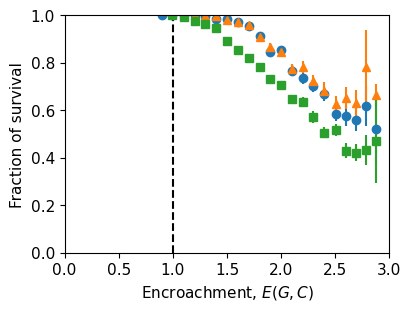

In [13]:
plt.figure(figsize=(4, 3),constrained_layout=True)

plt.errorbar(Eval[0][6:],Fval[0][6:], xerr=0, yerr= Fval[1][6:], marker = 'o',ls='none')
plt.errorbar(Eval[0][6:],FLival[0][6:], xerr=0, yerr= FLival[1][6:], marker = '^',ls='none')
plt.errorbar(Eval[0][6:],FLoval[0][6:], xerr=0, yerr= FLoval[1][6:], marker = 's',ls='none')

#plt.legend(['Fluctuating','Stable'],loc = "lower left")
plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of survival')
plt.savefig("../../figures/FigS4emb5v1.eps", format = "eps")

steady state

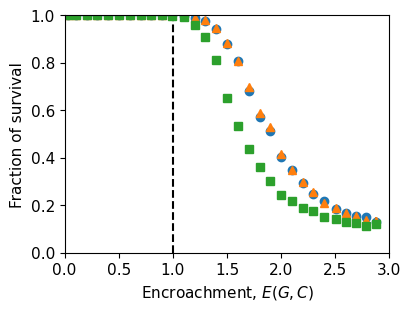

In [14]:
plt.figure(figsize=(4, 3),constrained_layout=True)

plt.errorbar(Eval[0],Sval[0], xerr=0, yerr= Sval[1], marker = 'o',ls='none')
plt.errorbar(Eval[0],SLival[0], xerr=0, yerr= SLival[1], marker = '^',ls='none')
plt.errorbar(Eval[0],SLoval[0], xerr=0, yerr= SLoval[1], marker = 's',ls='none')

#plt.legend(['Fluctuating','Stable'],loc = "lower left")
plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of survival')
plt.savefig("../../figures/FigS4emb6v1.eps", format = "eps")